<a href="https://colab.research.google.com/github/hdjwis/FastballPrediction/blob/main/FastballPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 24.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
from pybaseball import statcast
from pybaseball import playerid_lookup

# get data for July 15th, 2017 from pybaseball
data = statcast('2017-07-15', '2017-07-15')

This is a large query, it may take a moment to complete


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
100%|██████████| 1/1 [00:09<00:00,  9.80s/it]


In [ ]:
data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
3359,SI,2017-07-15,91.1,1.23,5.86,"Grace, Matt",608385,594840,field_out,hit_into_play,...,1,0,1,6,2,1,2.16,0.34,0.34,<NA>
3525,SL,2017-07-15,83.4,1.49,5.93,"Grace, Matt",608385,594840,NaN,called_strike,...,1,0,1,6,2,1,3.04,-0.57,-0.57,<NA>
3614,SL,2017-07-15,83.9,1.62,5.95,"Grace, Matt",594988,594840,field_out,hit_into_play,...,1,4,1,1,2,1,2.74,-0.6,-0.6,<NA>
3733,SL,2017-07-15,83.7,1.51,5.97,"Grace, Matt",594988,594840,NaN,ball,...,1,4,1,1,2,1,2.63,-0.65,-0.65,<NA>
3831,SL,2017-07-15,83.1,1.59,6.08,"Grace, Matt",553993,594840,field_out,hit_into_play,...,1,4,1,1,2,1,2.34,-0.63,0.63,<NA>


In [ ]:
data = data.drop(['release_speed', 'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher', 'events', 'description', 'spin_dir', 'spin_rate_deprecated',
           'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des', 'game_type', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type',
           'game_year',	'pfx_x',	'pfx_z',	'plate_x',	'plate_z', 'hc_x',	'hc_y',	'tfs_deprecated',	'tfs_zulu_deprecated',	'umpire',	'sv_id',	'vx0',	'vy0',
           'vz0',	'ax',	'ay',	'az',	'sz_top',	'sz_bot',	'hit_distance_sc',	'launch_speed',	'launch_angle',	'effective_speed',	'release_spin_rate',
           'release_extension',	'game_pk',	'fielder_2',	'fielder_3',	'fielder_4',	'fielder_5',	'fielder_6',	'fielder_7',	'fielder_8',	'fielder_9',
           'release_pos_y',	'estimated_ba_using_speedangle',	'estimated_woba_using_speedangle',	'woba_value',	'woba_denom',	'babip_value',	'iso_value',
           'launch_speed_angle', 	'home_score',	'away_score', 'post_away_score',	'post_home_score',	'post_bat_score',	'post_fld_score',
           'spin_axis',	'delta_home_win_exp',	'delta_run_exp',	'bat_speed',	'swing_length',	'estimated_slg_using_speedangle',	'delta_pitcher_run_exp',
           'hyper_speed',	'home_score_diff', 'home_win_exp',	'bat_win_exp', 'age_pit_legacy',	'age_bat_legacy',	'age_pit',	'age_bat',
           'n_priorpa_thisgame_player_at_bat',	'pitcher_days_since_prev_game',	'batter_days_since_prev_game',	'pitcher_days_until_next_game',
           'batter_days_until_next_game',	'api_break_z_with_gravity',	'api_break_x_arm',	'api_break_x_batter_in',	'arm_angle', 'bat_score', 'fld_score'], axis=1)

In [ ]:
data.shape

(4557, 19)

In [ ]:
data['pitch_type'].value_counts()


,count
pitch_type,
SI,1284
FF,1203
SL,807
CH,510
CU,316
FC,240
KC,141
FS,35
ST,15


In [ ]:
data.dropna()
data.shape

(4557, 19)

In [ ]:
data['on_3b'] = data['on_3b'].apply(lambda x: 1 if x > 0 else 0)
data['on_2b'] = data['on_2b'].apply(lambda x: 1 if x > 0 else 0)
data['on_1b'] = data['on_1b'].apply(lambda x: 1 if x > 0 else 0)
data['fastball'] = data['pitch_type'].apply(lambda x: 1 if x in ['FF', 'FC', 'SI'] else 0)
data = data.drop('pitch_type', axis=1)

In [ ]:
data['on_3b'].value_counts()

,count
on_3b,
0,4162
1,395


In [ ]:
data['on_2b'].value_counts()

,count
on_2b,
0,3727
1,830


In [ ]:
data['on_1b'].value_counts()

,count
on_1b,
0,3218
1,1339


In [ ]:
data['fastball'].value_counts()

,count
fastball,
1,2727
0,1830


In [ ]:
data.head()

,game_date,stand,p_throws,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,at_bat_number,pitch_number,pitch_name,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball
3359,2017-07-15,L,L,0,1,0,0,0,2,9,Bot,88,2,Sinker,Standard,Standard,-3,1,1
3525,2017-07-15,L,L,0,0,0,0,0,2,9,Bot,88,1,Slider,Standard,Standard,-3,1,0
3614,2017-07-15,L,L,1,0,0,0,0,1,9,Bot,87,2,Slider,Infield shift,Standard,-3,1,0
3733,2017-07-15,L,L,0,0,0,0,0,1,9,Bot,87,1,Slider,Infield shift,Standard,-3,1,0
3831,2017-07-15,R,L,3,2,0,0,0,0,9,Bot,86,6,Slider,Standard,Standard,-3,1,0


In [ ]:
data['batter_handedness'] = data['stand'].apply(lambda x: 1 if x == 'R' else 0)
data['pitcher_handedness'] = data['p_throws'].apply(lambda x: 1 if x == 'R' else 0)
data = data.drop(['game_date', 'stand', 'p_throws', 'inning_topbot', 'at_bat_number', 'pitch_name'], axis=1)
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
3359,0,1,0,0,0,2,9,2,Standard,Standard,-3,1,1,0,0
3525,0,0,0,0,0,2,9,1,Standard,Standard,-3,1,0,0,0
3614,1,0,0,0,0,1,9,2,Infield shift,Standard,-3,1,0,0,0
3733,0,0,0,0,0,1,9,1,Infield shift,Standard,-3,1,0,0,0
3831,3,2,0,0,0,0,9,6,Standard,Standard,-3,1,0,1,0


In [ ]:
data['if_fielding_alignment'].value_counts()

,count
if_fielding_alignment,
Standard,3625
Infield shift,515
Strategic,258
Infield shade,156


In [ ]:
data['of_fielding_alignment'].value_counts()

,count
of_fielding_alignment,
Standard,4219
Strategic,335


In [ ]:
data['if_fielding_alignment'] = data['if_fielding_alignment'].apply(lambda x: 1 if x == 'Standard' else 0)
data['of_fielding_alignment'] = data['of_fielding_alignment'].apply(lambda x: 1 if x == 'Standard' else 0)

In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
3359,0,1,0,0,0,2,9,2,1,1,-3,1,1,0,0
3525,0,0,0,0,0,2,9,1,1,1,-3,1,0,0,0
3614,1,0,0,0,0,1,9,2,0,1,-3,1,0,0,0
3733,0,0,0,0,0,1,9,1,0,1,-3,1,0,0,0
3831,3,2,0,0,0,0,9,6,1,1,-3,1,0,1,0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [ ]:
data.groupby(['balls','strikes'])['fastball'].value_counts()

balls  strikes  fastball
0      0        1           714
                0           451
       1        1           329
                0           259
       2        1           150
                0           137
1      0        1           296
                0           156
       1        1           272
                0           197
       2        1           229
                0           225
2      0        1           103
                0            38
       1        1           124
                0           102
       2        1           191
                0           161
3      0        1            58
                0             1
       1        1            90
                0            15
       2        1           171
                0            88
Name: count, dtype: int64

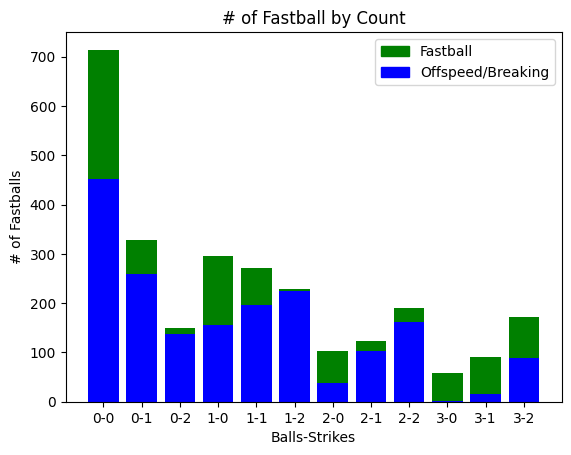

In [ ]:
fig, ax = plt.subplots()
for fastball_val in data['fastball'].unique():
  for i in np.sort(data['balls'].unique()):
    for j in np.sort(data['strikes'].unique()):
      s = data[data['fastball'] == fastball_val].groupby(['balls','strikes'])['fastball'].value_counts()
      color = 'green' if fastball_val == 1 else 'blue'
      ax.bar(x=f'{i}-{j}', height=s[i][j], color=color)

plt.xlabel('Balls-Strikes')
plt.ylabel('# of Pitch Types')
plt.title('# of Type of Pitches by Count')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
plt.show()


In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
3359,0,1,0,0,0,2,9,2,1,1,-3,1,1,0,0
3525,0,0,0,0,0,2,9,1,1,1,-3,1,0,0,0
3614,1,0,0,0,0,1,9,2,0,1,-3,1,0,0,0
3733,0,0,0,0,0,1,9,1,0,1,-3,1,0,0,0
3831,3,2,0,0,0,0,9,6,1,1,-3,1,0,1,0


In [ ]:
data.groupby(['on_1b', 'on_2b', 'on_3b'])['fastball'].value_counts()


on_1b  on_2b  on_3b  fastball
0      0      0      1           1631
                     0           1080
              1      0             59
                     1             58
       1      0      1            180
                     0            169
              1      0             29
                     1             12
1      0      0      1            498
                     0            258
              1      1             87
                     0             56
       1      0      1            206
                     0            140
              1      1             55
                     0             39
Name: count, dtype: int64

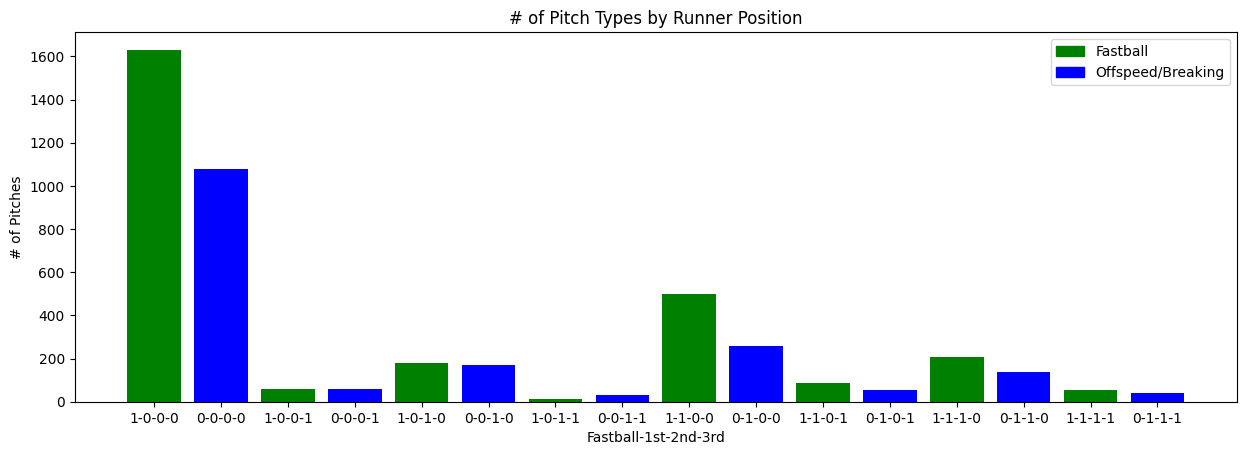

In [ ]:
fig, ax = plt.subplots()

for i in data['on_1b'].unique():
  for j in data['on_2b'].unique():
    for k in data['on_3b'].unique():
      for fastball_val in data['fastball'].unique():
        s = data[data['fastball'] == fastball_val].groupby(['on_1b', 'on_2b', 'on_3b'])['fastball'].value_counts()
        color = 'green' if fastball_val == 1 else 'blue'
        ax.bar(x=f'{fastball_val}-{i}-{j}-{k}', height=s[i][j][k], color=color)


plt.xlabel('Fastball-1st-2nd-3rd')
plt.ylabel('# of Pitches')
plt.title('# of Pitch Types by Runner Position')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
fig.set_figwidth(15)
plt.show()


In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
3359,0,1,0,0,0,2,9,2,1,1,-3,1,1,0,0
3525,0,0,0,0,0,2,9,1,1,1,-3,1,0,0,0
3614,1,0,0,0,0,1,9,2,0,1,-3,1,0,0,0
3733,0,0,0,0,0,1,9,1,0,1,-3,1,0,0,0
3831,3,2,0,0,0,0,9,6,1,1,-3,1,0,1,0


In [ ]:
data.groupby(['n_thruorder_pitcher'])['fastball'].value_counts()


n_thruorder_pitcher  fastball
1                    1           1718
                     0           1018
2                    1            611
                     0            471
3                    1            383
                     0            328
4                    1             15
                     0             13
Name: count, dtype: int64

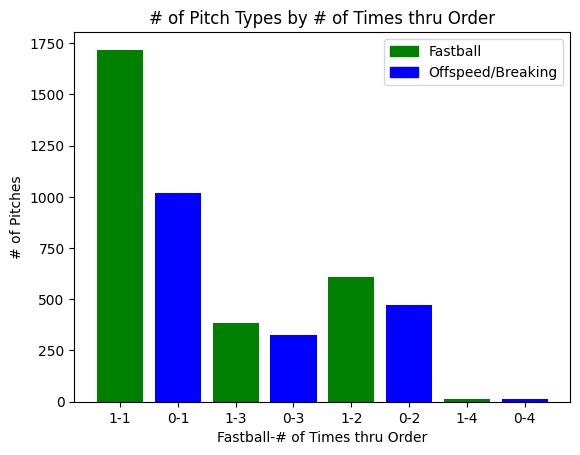

In [ ]:
fig, ax = plt.subplots()

for i in data['n_thruorder_pitcher'].unique():
  for fastball_val in data['fastball'].unique():
    s = data[data['fastball'] == fastball_val].groupby(['n_thruorder_pitcher'])['fastball'].value_counts()
    color = 'green' if fastball_val == 1 else 'blue'
    ax.bar(x=f'{fastball_val}-{i}', height=s[i], color=color)


plt.xlabel('Fastball-# of Times thru Order')
plt.ylabel('# of Pitches')
plt.title('# of Pitch Types by # of Times thru Order')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
plt.show()


In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
3359,0,1,0,0,0,2,9,2,1,1,-3,1,1,0,0
3525,0,0,0,0,0,2,9,1,1,1,-3,1,0,0,0
3614,1,0,0,0,0,1,9,2,0,1,-3,1,0,0,0
3733,0,0,0,0,0,1,9,1,0,1,-3,1,0,0,0
3831,3,2,0,0,0,0,9,6,1,1,-3,1,0,1,0


In [136]:
data.groupby(['inning'])['fastball'].value_counts()


inning  fastball
1       1           342
        0           151
2       1           306
        0           202
3       1           287
        0           208
4       1           272
        0           195
5       1           297
        0           191
6       0           252
        1           242
7       1           307
        0           206
8       1           285
        0           195
9       1           252
        0           138
10      0            25
        1            12
11      0            18
        1            15
12      0            14
        1             9
13      1            17
        0             9
14      1            27
        0             7
15      1            19
        0            13
16      1            38
        0             6
Name: count, dtype: int64

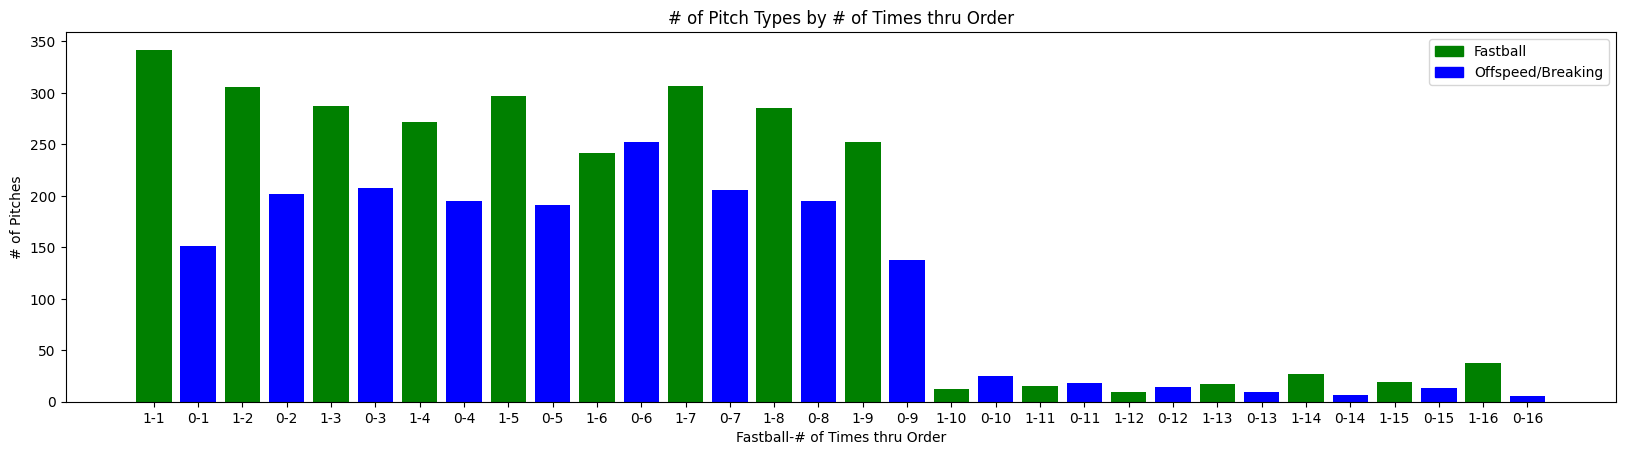

In [140]:
fig, ax = plt.subplots()

for i in np.sort(data['inning'].unique()):
  for fastball_val in data['fastball'].unique():
    s = data[data['fastball'] == fastball_val].groupby(['inning'])['fastball'].value_counts()
    color = 'green' if fastball_val == 1 else 'blue'
    ax.bar(x=f'{fastball_val}-{i}', height=s[i], color=color)


plt.xlabel('Fastball-# of Times thru Order')
plt.ylabel('# of Pitches')
plt.title('# of Pitch Types by # of Times thru Order')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
fig.set_figwidth(20)
plt.show()


In [141]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
3359,0,1,0,0,0,2,9,2,1,1,-3,1,1,0,0
3525,0,0,0,0,0,2,9,1,1,1,-3,1,0,0,0
3614,1,0,0,0,0,1,9,2,0,1,-3,1,0,0,0
3733,0,0,0,0,0,1,9,1,0,1,-3,1,0,0,0
3831,3,2,0,0,0,0,9,6,1,1,-3,1,0,1,0
